In [1]:
# import required libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from math import isnan

In [4]:
# changing theme for seaborn
sns.set_theme(style="white", palette=None)

In [5]:
# read the data from the csv file

df = pd.read_csv('../Datasets/train.csv', low_memory = False)

In [6]:
# check the head of the dataframe
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
# check the shape of the DataFrame
df.shape

(100000, 28)

In [8]:
# Create a DataFrame using only required features

train = df[['Annual_Income', 'Num_of_Delayed_Payment','Num_of_Loan', 'Delay_from_due_date', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance']]

<AxesSubplot: >

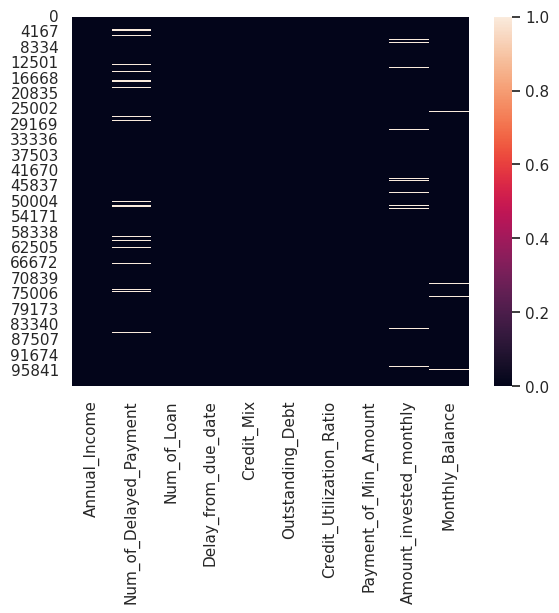

In [9]:
# check for any missing values in the data
sns.heatmap(train.isna())
# Data contains missing Values

In [10]:
# Function to calculate the mean of a given column
def calMean(col):
    '''
        Function to calculate the mean of the column given the column name.
        
        col: name of the column from the DataFrame
        return: the mean value and the name of the column
    '''
    c_mean = train[col].mean(axis=0, skipna=True)
    return c_mean

In [11]:
# clean the data

# general function to remove NaN values
def removeNaN(var, col_name):
    '''
        Function removes all the NaN values present in the data,
        by replacing the NaN values by the mean values of the given column.
    '''
    
    col_mean = calMean(col_name)
    
    if isnan(val):
        return col_mean
    else:
        return val

In [12]:
# function to remove the string values in the data
def replaceStr(var):
    if '_' in var:
        s = var.replace('_', '')
        return float(s)
    else:
        return float(var)
    

In [13]:
# function to remove multiple '_'
def replaceStrN(var):
    c = 0
    try:
        temp = float(var)
        return temp
    except:
        for i in range(len(var)):
            if var[i] == '_':
                c += 1
        temp = var.replace('_', '', c)
        return float(temp)
    

In [14]:
# funtion to convert all values into float values
def convertFloat(var):
    if isnan(var):
        return var
    else:
        return float(var)

In [15]:
# function to convert all values into float values
def convertInt(var):
    if isnan(var):
        return var
    else:
        return int(var)

In [16]:
# clean the Annual Income Column
train['Annual_Income'] = train['Annual_Income'].apply(replaceStr)
train['Annual_Income'] = train['Annual_Income'].apply(convertFloat)

<AxesSubplot: >

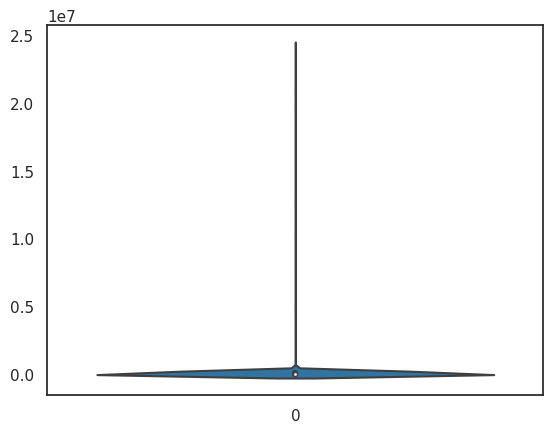

In [17]:
sns.violinplot(train['Annual_Income'])

In [18]:
# function to remove NaN values
def removeNaNx(x):
    m = train['Num_of_Delayed_Payment'].mean(axis=0,skipna=True)
    if isnan(x):
        return m
    else:
        return x

In [19]:
# clean Num_of_delayed_Payments columns
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(replaceStrN)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(removeNaNx)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(convertFloat)

<AxesSubplot: >

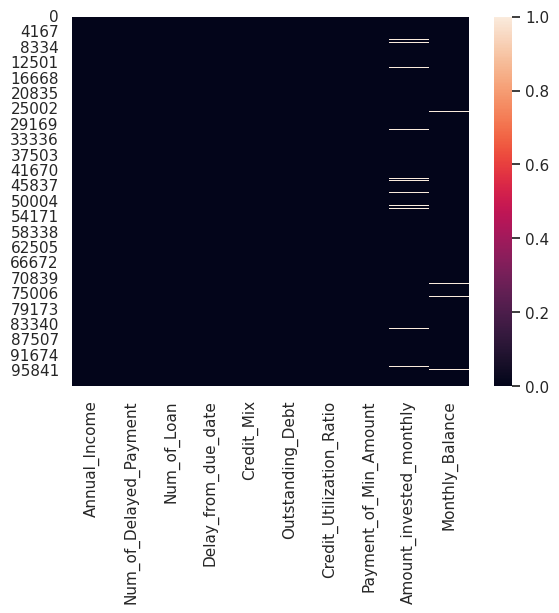

In [20]:
sns.heatmap(train.isna())

In [21]:
train['Num_of_Delayed_Payment']

0         7.000000
1        30.923342
2         7.000000
3         4.000000
4        30.923342
           ...    
99995     7.000000
99996     7.000000
99997     6.000000
99998    30.923342
99999     6.000000
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

In [22]:
# function to correct the loans
def reduceLoan(a):
    
    m = train['Num_of_Loan'].mean(axis=0,skipna=True)
    for i in range(len(train['Num_of_Loan'])):
        if (a >= 10) or (a < 0):
            return m
        else:
            return a

In [23]:
# number of loan column
train['Num_of_Loan'] = train['Num_of_Loan'].apply(replaceStr)
train['Num_of_Loan'] = train['Num_of_Loan'].apply(reduceLoan)
train['Num_of_Loan'] = train['Num_of_Loan'].apply(convertInt)

In [24]:
# credit mix column
# function to correct  the credit mix column
def correctCreditMix(c):
    if '_' in c:
        return "Standard"
    else:
        return c

In [25]:
train['Credit_Mix'] = train['Credit_Mix'].apply(correctCreditMix)

In [26]:
# using label encoder to convert data into numeric values
from sklearn.preprocessing import LabelEncoder

In [27]:
# create a model of LabelEncode class
le = LabelEncoder()

In [28]:
le.fit(train['Credit_Mix'])
train['Credit_Mix'] = le.transform(train['Credit_Mix']) # converted data into numeric valu

<AxesSubplot: >

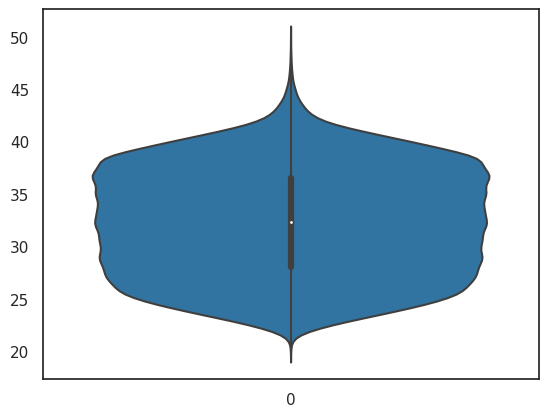

In [29]:
# credit utilization ratio column
sns.violinplot(train['Credit_Utilization_Ratio'])

In [30]:
# payment of min amount column
# contains abnormal values such as NM
# assuming nm = No

def correctMinAmount(ma):
    if ma == 'NM':
        return 'No'
    else:
        return ma

In [31]:
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].apply(correctMinAmount) # contains corrected values

In [32]:
# convert into numeric data
le.fit(train['Payment_of_Min_Amount'])
train['Payment_of_Min_Amount'] = le.transform(train['Payment_of_Min_Amount'])

<AxesSubplot: xlabel='Payment_of_Min_Amount', ylabel='Count'>

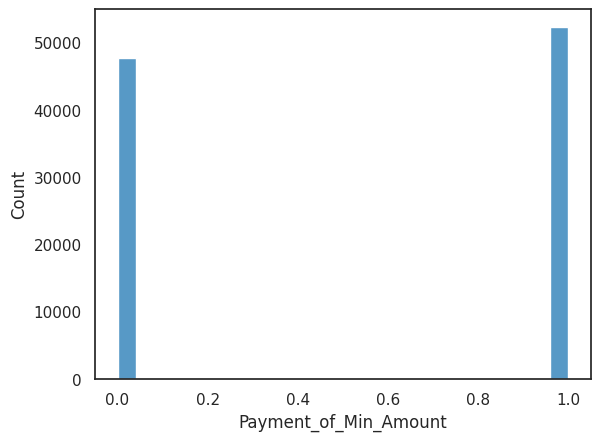

In [33]:
sns.histplot(data=train, x='Payment_of_Min_Amount')

In [34]:
# function to remove NaN from the outstanding debt column
def removeNaNOD(var):
    m = train['Outstanding_Debt'].mean(axis=0, skipna=True)
    if isnan(var):
        return m
    else:
        return var

In [35]:
# outstanding debt column
train['Outstanding_Debt'] = train['Outstanding_Debt'].apply(replaceStrN)
train['Outstanding_Debt'] = train['Outstanding_Debt'].apply(removeNaNOD)
train['Outstanding_Debt'] = train['Outstanding_Debt'].apply(convertFloat)

In [36]:
# amount invested monthly column

#function to remove the outliers
def removeOutliers(var):
    m = train['Amount_invested_monthly'].mean(axis=0, skipna=True)
    if var > 5000:
        return m + 100
    else:
        return var

In [37]:
# function to remove NaN values
def removeNaNAIM(var):
    m = train['Amount_invested_monthly'].mean(axis=0, skipna=True)
    if isnan(var):
        return m
    else:
        return var

In [38]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].apply(replaceStrN)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].apply(removeNaNAIM)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].apply(removeOutliers)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].apply(convertFloat)

In [39]:
# drop monthly balance column
train.drop('Monthly_Balance', axis=1,  inplace=True)

In [40]:
train.head()

,Annual_Income,Num_of_Delayed_Payment,Num_of_Loan,Delay_from_due_date,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly
0,19114.12,7.000000,4,3,2,809.98,26.822620,0,80.415295
1,19114.12,30.923342,4,-1,1,809.98,31.944960,0,118.280222
2,19114.12,7.000000,4,3,1,809.98,28.609352,0,81.699521
3,19114.12,4.000000,4,5,1,809.98,31.377862,0,199.458074
4,19114.12,30.923342,4,6,1,809.98,24.797347,0,41.420153


<AxesSubplot: >

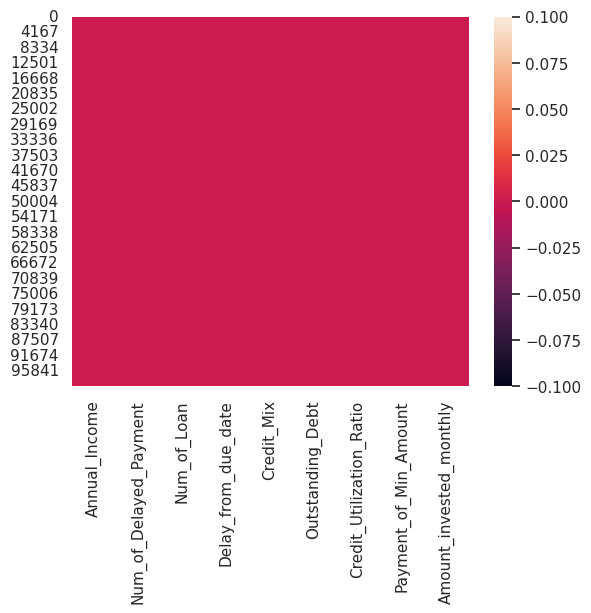

In [41]:
sns.heatmap(train.isna())
# No missing data

In [42]:
# ****** Data Cleaning Complete ****** #

In [45]:
# train the model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [47]:
# split the data into training and testing data
y = df['Credit_Score']
X_train, x_test, Y_train, y_test = train_test_split(train, y)

In [48]:
X_train.shape

(75000, 9)

In [49]:
# create a model object of SVC class
model = SVC()

In [50]:
# fit the training data to the model
model.fit(X_train, Y_train)

SVC()

In [51]:
pred = model.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot: >

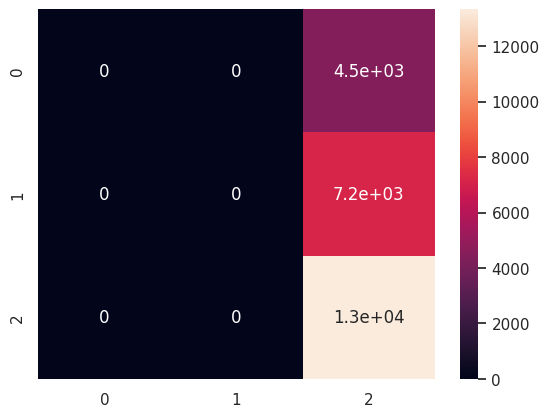

In [55]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [79]:
print(classification_report(y_test, pred))

/home/chandu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      4477
        Poor       0.00      0.00      0.00      7185
    Standard       0.53      1.00      0.70     13338

    accuracy                           0.53     25000
   macro avg       0.18      0.33      0.23     25000
weighted avg       0.28      0.53      0.37     25000



/home/chandu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chandu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# poor performance while using SVM

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model1 = DecisionTreeClassifier()

In [60]:
model1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [61]:
y_pred = model1.predict(x_test)

In [62]:
print(y_pred)

['Good' 'Poor' 'Poor' ... 'Poor' 'Standard' 'Standard']


<AxesSubplot: >

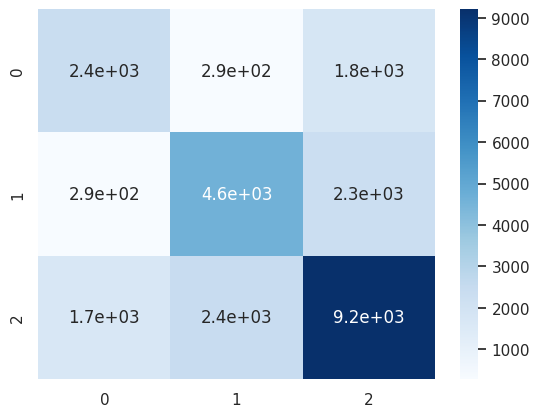

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.55      0.54      0.54      4477
        Poor       0.63      0.64      0.63      7185
    Standard       0.69      0.69      0.69     13338

    accuracy                           0.65     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.65      0.65      0.65     25000



In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
model2 = KNeighborsClassifier()

In [69]:
model2.fit(X_train, Y_train)

KNeighborsClassifier()

In [70]:
y1_pred = model2.predict(x_test)

<AxesSubplot: >

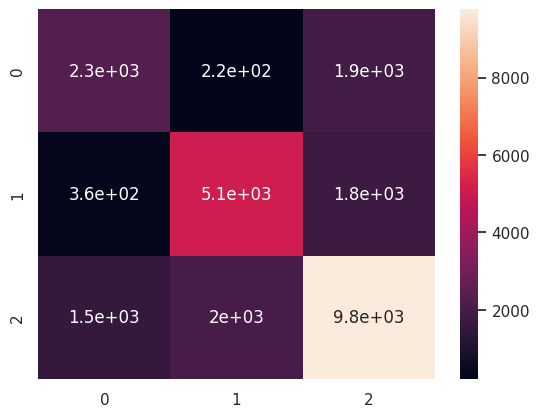

In [71]:
sns.heatmap(confusion_matrix(y_test, y1_pred), annot=True)

In [72]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

        Good       0.55      0.52      0.54      4477
        Poor       0.69      0.71      0.70      7185
    Standard       0.73      0.73      0.73     13338

    accuracy                           0.69     25000
   macro avg       0.66      0.65      0.66     25000
weighted avg       0.69      0.69      0.69     25000



In [74]:
# elbow method to determine correct value of k
error_rate = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

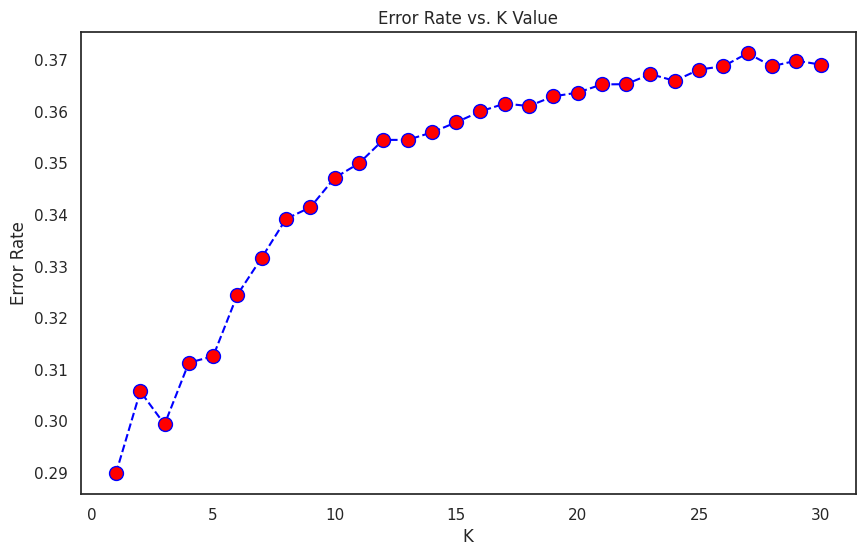

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
# error rate is least when n_neighbors = 1 

In [78]:
# overall model accuracy = 69% or 0.69 (using KNN)